In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(0,"../")
import matplotsoccer as mps
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import json
import numpy as np
from scipy.ndimage import gaussian_filter

ModuleNotFoundError: No module named 'scipy.ndimage'

In [15]:
# Read json file with all the shot data
data = []
with open('shot_data.json','r') as file:
    data = json.load(file)

In [9]:
# Read json file as pandas dataframe
df = pd.read_json('shot_data.json')

In [13]:
type(df['distance'][0])

numpy.float64

In [3]:
# data[:10]

In [16]:
# store shot locations separately
x_coord = []
y_coord = []
for shot in data:
    x_coord.append(shot['location'][0])
    y_coord.append(shot['location'][1])
    
x = np.array(x_coord)
y = np.array(y_coord)

# Convert numpy to pandas series
x = pd.Series(x)
y = pd.Series(y)

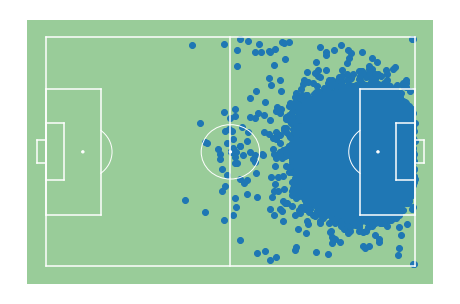

In [17]:
mps.field("green",figsize=8,show=False)
plt.scatter(x,y)
plt.axis("off")
# plt.savefig("../img/scatter.png",dpi=100,bbox_inches="tight",padding=0)
plt.show()

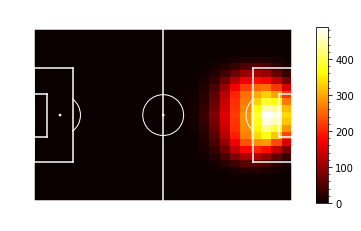

In [22]:
hm = mps.count(x,y,n=25,m=25)
hm = gaussian_filter(hm,1)
mps.heatmap(matrix=hm,cmap="hot",linecolor="white",cbar=True,show=False)
# plt.savefig("../img/heatmap_hot.png",bbox_inches="tight",padding=0)
plt.show()